<a href="https://colab.research.google.com/github/jeonyeohun/2020_2_DeepLearning_Application/blob/master/HW_2_linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import random
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

!pip install mglearn
import mglearn

## Logistic Regression

TO DO: define two functions GetClass1(X) and GetClass2(X)

* GetClass1(X) returns (X * 0.5 + np.abs(np.sin(X * np.pi / 180)) * 180 + np.random.normal(0, 30, len(X)))
* GetClass2(X) returns (X * 0.5 + 50 - np.abs(np.cos(X * np.pi / 180)) * 180 + np.random.normal(0, 30, len(X)))


In [127]:
def GetClass1(X):
  return (X * 0.5 + np.abs(np.sin(X * np.pi / 180)) * 180 + np.random.normal(0, 30, len(X)))

def GetClass2(X):
  return (X * 0.5 + 50 - np.abs(np.cos(X * np.pi / 180)) * 180 + np.random.normal(0, 30, len(X)))

TO DO:
* Set random seed by 12 using np.random.seed()
* Create an array composed of 100 numbers from 0 to 360
* Draw plot using X and GetClass1(X)
* Draw plot using X and GetClass2(X)

<function matplotlib.pyplot.show>

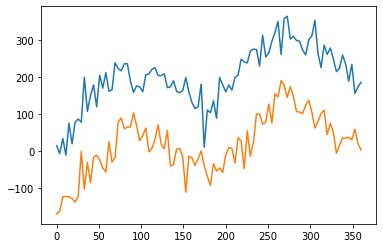

In [128]:
np.random.seed(12)
X = np.linspace(0, 360, 100)

plt.plot(X, GetClass1(X))
plt.plot(X, GetClass2(X))
plt.show

TO DO: Create class 1 samples
* Create an array $x_{11}$ composed of 50 random numbers between 0 and 360.
* Create an array $x_{12}$ by GetClass1($x_{11}$).
* Create an array $y_1$ of size 50 filled with zeros.
* Combine $x_{11}$, $x_{12}$ and $y_1$ to make a 50x3 array $d_1$. (Use np.expand_dims() and np.concatenate().)
* print the first 10 rows of $d_1$

In [129]:
x11 = np.random.uniform(0, 360, 50)
x12 = GetClass1(x11)
y1 = np.zeros(50)

d1 = np.concatenate((np.expand_dims(x11, axis=1), np.expand_dims(x12, axis=1), np.expand_dims(y1, axis=1)), axis=1)

print("d1 = ", d1[:10])

d1 =  [[ 13.658839    56.07105357   0.        ]
 [ 55.80406329 141.87970265   0.        ]
 [ 61.43364224  98.32685969   0.        ]
 [277.312394   335.01132799   0.        ]
 [ 86.11147478 232.58314643   0.        ]
 [268.9812314  282.27771924   0.        ]
 [125.09790647 248.50314149   0.        ]
 [238.03681255 269.16267577   0.        ]
 [235.63943994 252.1114025    0.        ]
 [ 83.87133944 191.99547334   0.        ]]


TO DO: Create class 2 samples
* Create an array $x_{21}$ composed of 50 random numbers between 0 and 360.
* Create an array $x_{22}$ by GetClass2($x_{21}$).
* Create an array $y_2$ of size 50 filled with ones.
* Combine $x_{21}$, $x_{22}$ and $y_2$ to make a 50x3 array $d_2$. (Use np.expand_dims() and np.concatenate().)
* print the first 10 rows of $d_2$

In [130]:
x21 = np.random.uniform(0, 360, 50)
x22 = GetClass2(x21)
y2 = np.ones(50)

d2 = np.concatenate((np.expand_dims(x21, axis=1), np.expand_dims(x22, axis=1), np.expand_dims(y2, axis=1)), axis=1)

print("d2 = ", d2[:10])

d2 =  [[202.11365676  -4.40781031   1.        ]
 [ 37.11143784 -80.78783649   1.        ]
 [112.07735169  22.29304467   1.        ]
 [290.47736536 158.97892151   1.        ]
 [174.97262355 -53.99433601   1.        ]
 [344.06435284  17.82628423   1.        ]
 [257.24052307 158.03712683   1.        ]
 [ 41.48832038 -68.78765653   1.        ]
 [161.23024625 -29.87055773   1.        ]
 [189.63701275 -23.00935382   1.        ]]


TO DO: Make X and y from $d_1$ and $d_2$.
* Combine $d_1$ and $d_2$ to make a 100x3 array $d$.
* Shuffle the row of $d$ using np.random.shuffle().
* Create a 100x2 array $X$ by the first two columns of $d$.
* Create a single rank array $y$ by the last column of $d$.
* Print the first 10 rows of X
* Print the first 10 elements of y

In [131]:

d = np.concatenate((d1, d2), axis=0)
np.random.shuffle(d)
X = d[:100, :2]
y = np.squeeze(d[:100, -1])

print("X = ", X[:10])
print("y = ", y[:10])

X =  [[  4.99052932  21.19180388]
 [335.28798028  72.71503033]
 [ 19.18211324 -82.4172931 ]
 [151.5509172  196.14291664]
 [125.09790647 248.50314149]
 [257.24052307 158.03712683]
 [170.46121082 -59.66050965]
 [305.52197828 104.65034349]
 [277.312394   335.01132799]
 [ 59.68092879 -28.41599808]]
y =  [0. 1. 1. 0. 0. 1. 1. 1. 0. 1.]


TO DO: Draw scatter chart using mglearn.discrete_scatter()

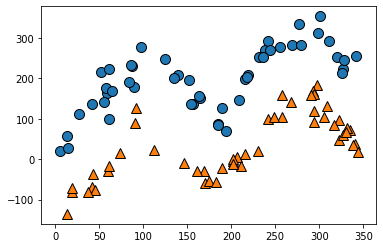

In [132]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

TO DO: split X and y into a training set and a test set using train_test_split()

In [134]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y)

TO DO: Create a LogisticRegression object and train with the training samples

In [136]:
lg = sk.linear_model.LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

TO DO: Compare the predicted values with the ground truth values.
* Predict y of the test input samples (e.g., X_test) using the LogisticRegression object
* Compare the predicted values and the groud truth values as the output example.

In [145]:
y = lg.predict(X_test)

result = (y_test == y)

for i in range(len(y_test)):
  print(y[i] , "vs.", y_test[i], "(match = ", y[i] == y_test[i], ")")

1.0 vs. 0.0 (match =  False )
1.0 vs. 1.0 (match =  True )
1.0 vs. 1.0 (match =  True )
1.0 vs. 1.0 (match =  True )
0.0 vs. 0.0 (match =  True )
1.0 vs. 1.0 (match =  True )
0.0 vs. 0.0 (match =  True )
0.0 vs. 0.0 (match =  True )
1.0 vs. 1.0 (match =  True )
0.0 vs. 0.0 (match =  True )
1.0 vs. 1.0 (match =  True )
0.0 vs. 0.0 (match =  True )
1.0 vs. 1.0 (match =  True )
0.0 vs. 0.0 (match =  True )
1.0 vs. 1.0 (match =  True )
1.0 vs. 1.0 (match =  True )
1.0 vs. 1.0 (match =  True )
0.0 vs. 0.0 (match =  True )
0.0 vs. 0.0 (match =  True )
0.0 vs. 0.0 (match =  True )
0.0 vs. 0.0 (match =  True )
1.0 vs. 1.0 (match =  True )
0.0 vs. 0.0 (match =  True )
0.0 vs. 0.0 (match =  True )
1.0 vs. 1.0 (match =  True )


TO DO: Print the training accuracy and test accuracy

In [146]:
print("traning accuracy =", lg.score(X_train, y_train))
print("test accuracy =", lg.score(X_test, y_test))


traning accuracy = 0.9333333333333333
test accuracy = 0.96


### Ridge regression

TO DO: Create input and output samples
* Create a 100x1 array $X$ composed of 100 numbers from 0 to 100.
* Create a 1D array $y$ from the 1st column of $X$ using the following formula: $y = (x-30)^2+100 + \epsilon$, where $\epsilon \in N(0, 100^2)$.
* Draw graph with X and y using plt.plot()

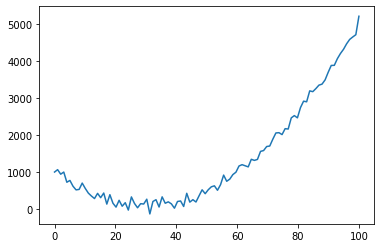

In [230]:
X = np.expand_dims(np.linspace(0, 100, 100), axis=1)
y = (X[:, 0]-30)**2 + 100 + np.random.normal(0, 100, 100)

plt.plot(X, y)
plt.show()

TO DO: Create an object of Ridge and train it with $X$ and $y$.

In [231]:
rdg = sk.linear_model.Ridge()
rdg.fit(X, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

TO DO: Plot $X$, $y$ and the prediction of Ridge from $X$.

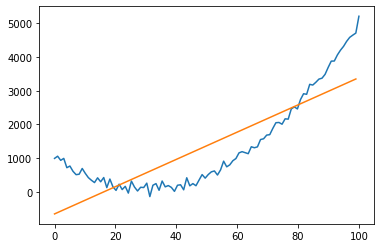

In [234]:
result = rdg.predict(X)
plt.plot(X, y)
plt.plot(result)
plt.show()


### Polynomial regression

TO DO: Create a 100x2 array $X_2$ derived from $X$.
* The first column is the same as $X$.
* The second column is composed of $X[i,0]^2$'s.
* Print the first 10 rows of $X_2$.

In [261]:
X2 = np.concatenate((np.expand_dims(X[:, 0], axis=1), np.expand_dims(X[:,0]**2, axis=1)), axis=1)
print(X2[:10])

[[ 0.          0.        ]
 [ 1.01010101  1.02030405]
 [ 2.02020202  4.0812162 ]
 [ 3.03030303  9.18273646]
 [ 4.04040404 16.32486481]
 [ 5.05050505 25.50760127]
 [ 6.06060606 36.73094582]
 [ 7.07070707 49.99489848]
 [ 8.08080808 65.29945924]
 [ 9.09090909 82.6446281 ]]


To DO: Create another Ridge object and training it with $X_2$ and $y$

In [262]:
rdg2 = sk.linear_model.Ridge()
rdg2.fit(X2, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

TO DO: Plot $X_2[:,0]$, $y$ and the prediction of Ridge from $X_2$.

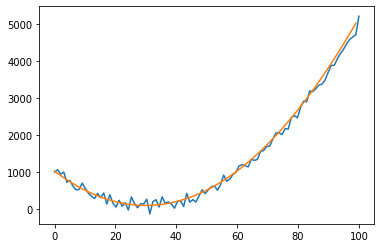

In [265]:
rlt = rdg2.predict(X2)
plt.plot(X2[:, 0], y)
plt.plot(rlt)
plt.show()